In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
box_file_dir = os.path.join(os.getcwd(), "..", "..", "Box")
file_path_csv = os.path.join(box_file_dir, "covid_pts_enc_level_labs_dx_2021-02-02_deid.csv")

In [3]:
df = pd.read_csv(file_path_csv, index_col=False)

In [4]:
df['zip_cust_table'].dtypes

dtype('O')

In [5]:
df.dtypes

admit_dt_tm                object
discharge_dt_tm            object
facility                   object
encounter_type_display     object
age_at_admit                int64
                           ...   
cancer_com_flag            object
qSOFA_score               float64
deid_empi_encounter        object
deid_mrn_encounter          int64
deid_fin_encounter          int64
Length: 70, dtype: object

In [6]:
Counter(df['race_display'])

Counter({'White': 2023,
         'Black or African American': 242,
         'Asian': 27,
         'Unknown': 50,
         'Other Race': 91,
         'American Indian/Alaska Native': 12,
         'Decline to Specify': 18,
         'Hispanic': 1,
         'Native Hawaiian or Other Pacific Islande': 5})

In [7]:
def latinx(row):
    if row.ethnicity_display == 'Hispanic or Latino' and row.race_display == 'White':
        return "Hispanic"
    elif row.ethnicity_display == 'Not Hispanic or Latino' and row.race_display == 'White': 
        return "White"
    else:
        return row.race_display
        

In [8]:
df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [9]:
Counter(df['race_display'])

Counter({'Hispanic': 1197,
         'Black or African American': 242,
         'White': 827,
         'Asian': 27,
         'Unknown': 50,
         'Other Race': 91,
         'American Indian/Alaska Native': 12,
         'Decline to Specify': 18,
         'Native Hawaiian or Other Pacific Islande': 5})

In [10]:
df['ethnicity_display']

0           Hispanic or Latino
1           Hispanic or Latino
2       Not Hispanic or Latino
3       Not Hispanic or Latino
4       Not Hispanic or Latino
                 ...          
2464                   Unknown
2465    Not Hispanic or Latino
2466    Not Hispanic or Latino
2467        Hispanic or Latino
2468                   Unknown
Name: ethnicity_display, Length: 2469, dtype: object

In [11]:
zip_df = pd.read_csv('zip_code_data.csv', index_col=False)

In [12]:
zip_df['zip_code'] = zip_df.zip_code.apply(lambda x: x.strip('ZCTA5 '))

In [13]:
zip_df.head()

,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate
0,75001,3.8,11.4,72512,87472,10.9
1,75002,1.4,5.2,101429,125779,4.9
2,75006,2.1,12.3,64462,85788,10.8
3,75007,1.8,6.6,86648,102783,6.7
4,75009,1.2,6.1,111146,144513,4


In [14]:
df.columns

Index(['admit_dt_tm', 'discharge_dt_tm', 'facility', 'encounter_type_display',
       'age_at_admit', 'gender', 'zip_cust_table', 'ethnicity_display',
       'race_display', 'race_eth_comb', 'length_of_stay', 'icd_prim',
       'deceased_dt_tm', 'discharge_disposition_display', 'dc_dispo_cat',
       'insured_uninsured', 'admit_source', 'arrival_mode',
       'vent_hours_summed', 'vent_first_order_start_time',
       'vent_last_order_end_time', 'icu_hours_summed', 'icu_first_begin_time',
       'icu_last_end_time', 'occupation', 'occ_cat', 'emp_yn', 'Creatinine',
       'Abs_Lymph', 'ALT', 'AST', 'Bili_Total', 'D-Dimer',
       'Diastolic_Blood_Pressure', 'Dosing_Weight_(kg)', 'FiO2/Percent',
       'Glasgow_Coma_Score', 'Lymph_Auto', 'Oxygen_Delivery_Method',
       'Oxygen_Saturation', 'Platelet', 'pO2_Art', 'Procalcitonin',
       'Respiratory_Rate', 'Systolic_Blood_Pressure', 'Troponin-I', 'WBC',
       'Oxygen_Flow_Rate', 'Patient_Smoking_Status', 'Visit_Reason',
       'Height_(i

In [15]:
icu_df = df[~df['icu_hours_summed'].isnull()]

In [16]:
demo_df = icu_df[['zip_cust_table', 'ethnicity_display', 'age_at_admit', 'discharge_disposition_display', 'race_display', 'race_eth_comb', 'heart_pulse_comb', 'temp_oral_degC', 'calc_pulled_BMI', 'no_dx_data',
       'COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag', 'qSOFA_score' ]]

In [17]:
all_df = pd.merge(demo_df, zip_df, left_on='zip_cust_table', right_on='zip_code', how='inner')

In [18]:
len(all_df['zip_cust_table'].unique())

99

In [19]:
all_df.columns

Index(['zip_cust_table', 'ethnicity_display', 'age_at_admit',
       'discharge_disposition_display', 'race_display', 'race_eth_comb',
       'heart_pulse_comb', 'temp_oral_degC', 'calc_pulled_BMI', 'no_dx_data',
       'COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag', 'qSOFA_score', 'zip_code',
       'male_poverty_rate', 'female_poverty_rate', 'median_income',
       'mean_income', 'poverty_rate'],
      dtype='object')

In [20]:
all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].fillna(0)

In [21]:
all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].astype(int)

In [22]:
def comorbidity_count(row):
    count = 0 
    
    if row.COPD_com_flag == 1:
        count += 1 
        
    if row.asthma_com_flag == 1:
        count += 1 
        
    if row.diabetes_com_flag == 1:
        count += 1 
        
    if row.hypertension_com_flag == 1:
        count += 1 
        
    if row.CAD_com_flag == 1:
        count += 1 
        
    if row.heartfailure_com_flag == 1: 
        count += 1 
        
    if row.CKD_com_flag == 1:
        count += 1 
        
    if row.cancer_com_flag == 1:
        count += 1 
        
    return count

In [23]:
all_df['total_comorbidities'] = all_df.apply(lambda row: comorbidity_count(row), axis=1)

In [24]:
all_df

,zip_cust_table,ethnicity_display,age_at_admit,discharge_disposition_display,race_display,race_eth_comb,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,...,CKD_com_flag,cancer_com_flag,qSOFA_score,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,total_comorbidities
0,78130,Hispanic or Latino,44,Expired,Hispanic,White Hispanic,97.0,NaN,30.620000,False,...,0,0,3.0,78130,1.5,10,65627,84515,9.5,0
1,78130,Hispanic or Latino,71,Rehab Care,Hispanic,White Hispanic,101.0,37.2,27.760000,False,...,1,0,2.0,78130,1.5,10,65627,84515,9.5,2
2,78130,Hispanic or Latino,71,Skilled Nursing Care,Hispanic,White Hispanic,98.0,36.9,NaN,False,...,0,0,1.0,78130,1.5,10,65627,84515,9.5,3
3,78130,Unknown,47,Still a patient,White,White Unknown Ethnicity,98.0,36.7,NaN,False,...,0,0,0.0,78130,1.5,10,65627,84515,9.5,0
4,78612,Not Hispanic or Latino,49,Home,White,White Non Hispanic,99.0,37.4,44.890000,False,...,0,0,1.0,78612,6.3,10.9,69213,80458,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,78207,Not Hispanic or Latino,5,Expired,Black or African American,Other race Non Hispanic,122.0,NaN,18.312818,False,...,0,0,NaN,78207,3.1,44.2,27205,37257,38.7,0
672,79762,Hispanic or Latino,42,Home,Other Race,Other Race Hispanic,91.0,36.9,49.153355,False,...,0,0,0.0,79762,2,9.5,66584,88737,9.1,0
673,78132,Not Hispanic or Latino,22,Home,White,White Non Hispanic,87.0,37.4,19.280000,False,...,0,0,1.0,78132,2,4.2,106523,135706,3.9,0
674,76527,Unknown,51,Home,White,White Unknown Ethnicity,88.0,37.7,33.163386,False,...,0,0,1.0,76527,6.2,14,54940,80699,13.6,3


In [25]:
all_df['has_comorbidity'] = all_df.total_comorbidities.apply(lambda x: 1 if x >= 1 else 0)
all_df['death'] = all_df.discharge_disposition_display.apply(lambda x: 1 if x == 'Expired' else 0)

In [26]:
Counter(all_df['race_display'])

Counter({'Hispanic': 342,
         'White': 226,
         'Other Race': 26,
         'Decline to Specify': 4,
         'Black or African American': 53,
         'American Indian/Alaska Native': 4,
         'Asian': 5,
         'Unknown': 15,
         'Native Hawaiian or Other Pacific Islande': 1})

In [27]:
temp_df = all_df[~all_df['qSOFA_score'].isnull()]

## Race

In [28]:
# H-Test to test if racial group means are statistically different against average prediction of death
stats.kruskal(all_df['death'][all_df['race_display'] == 'Hispanic'],
               all_df['death'][all_df['race_display'] == 'White'],
               all_df['death'][all_df['race_display'] == 'Other Race'],
               all_df['death'][all_df['race_display'] == 'Decline to Specify'],
               all_df['death'][all_df['race_display'] == 'Black or African American'],
               all_df['death'][all_df['race_display'] == 'Asian'],
               all_df['death'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=20.81544413380237, pvalue=0.0019800496501617523)

In [29]:
# H-Test to test if racial group means are statistically different against average prediction of qSOFA_score
stats.kruskal(temp_df['qSOFA_score'][temp_df['race_display'] == 'Hispanic'],
               temp_df['qSOFA_score'][temp_df['race_display'] == 'White'],
               temp_df['qSOFA_score'][temp_df['race_display'] == 'Other Race'],
               temp_df['qSOFA_score'][temp_df['race_display'] == 'Decline to Specify'],
               temp_df['qSOFA_score'][temp_df['race_display'] == 'Black or African American'],
               temp_df['qSOFA_score'][temp_df['race_display'] == 'Asian'],
               temp_df['qSOFA_score'][temp_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=16.011796889041392, pvalue=0.013690788958323891)

In [30]:
# Means for qSOFA
print(temp_df['qSOFA_score'][temp_df['race_display'] == 'Hispanic'].mean())
print(temp_df['qSOFA_score'][temp_df['race_display'] == 'White'].mean())
print(temp_df['qSOFA_score'][temp_df['race_display'] == 'Asian'].mean())
print(temp_df['qSOFA_score'][temp_df['race_display'] == 'Black or African American'].mean())

0.9395770392749244
0.9166666666666666
0.4
1.0588235294117647


In [31]:
# H-Test to test if racial group means are statistically different against average prediction of total_comorbidities 
stats.kruskal(all_df['total_comorbidities'][all_df['race_display'] == 'Hispanic'],
               all_df['total_comorbidities'][all_df['race_display'] == 'White'],
               all_df['total_comorbidities'][all_df['race_display'] == 'Other Race'],
               all_df['total_comorbidities'][all_df['race_display'] == 'Decline to Specify'],
               all_df['total_comorbidities'][all_df['race_display'] == 'Black or African American'],
               all_df['total_comorbidities'][all_df['race_display'] == 'Asian'],
               all_df['total_comorbidities'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=12.37936907021303, pvalue=0.054021327631416635)

In [32]:
# H-Test to test if racial group means are statistically different against average prediction of has_comorbidities 
stats.kruskal(all_df['has_comorbidity'][all_df['race_display'] == 'Hispanic'],
               all_df['has_comorbidity'][all_df['race_display'] == 'White'],
               all_df['has_comorbidity'][all_df['race_display'] == 'Other Race'],
               all_df['has_comorbidity'][all_df['race_display'] == 'Decline to Specify'],
               all_df['has_comorbidity'][all_df['race_display'] == 'Black or African American'],
               all_df['has_comorbidity'][all_df['race_display'] == 'Asian'],
               all_df['has_comorbidity'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=6.786705746255251, pvalue=0.3410238570614818)

In [33]:
stats.kruskal(all_df['age_at_admit'][all_df['race_display'] == 'Hispanic'],
               all_df['age_at_admit'][all_df['race_display'] == 'White'],
               all_df['age_at_admit'][all_df['race_display'] == 'Other Race'],
               all_df['age_at_admit'][all_df['race_display'] == 'Decline to Specify'],
               all_df['age_at_admit'][all_df['race_display'] == 'Black or African American'],
               all_df['age_at_admit'][all_df['race_display'] == 'Asian'],
               all_df['age_at_admit'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=15.541128357125427, pvalue=0.016440741000557372)

In [34]:
stats.kruskal(all_df['COPD_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['COPD_com_flag'][all_df['race_display'] == 'White'],
               all_df['COPD_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['COPD_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['COPD_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['COPD_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['COPD_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=24.215337710829054, pvalue=0.0004767026562436333)

In [35]:

stats.kruskal(all_df['asthma_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['asthma_com_flag'][all_df['race_display'] == 'White'],
               all_df['asthma_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['asthma_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['asthma_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['asthma_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['asthma_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=2.977168606676161, pvalue=0.8117069144658652)

In [36]:
stats.kruskal(all_df['diabetes_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['diabetes_com_flag'][all_df['race_display'] == 'White'],
               all_df['diabetes_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['diabetes_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['diabetes_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['diabetes_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['diabetes_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=10.730366556501991, pvalue=0.09707589281200577)

In [37]:
stats.kruskal(all_df['hypertension_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['hypertension_com_flag'][all_df['race_display'] == 'White'],
               all_df['hypertension_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['hypertension_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['hypertension_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['hypertension_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['hypertension_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=13.64358671299326, pvalue=0.033881034538052794)

In [38]:
stats.kruskal(all_df['CAD_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['CAD_com_flag'][all_df['race_display'] == 'White'],
               all_df['CAD_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['CAD_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['CAD_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['CAD_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['CAD_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=16.115331764078974, pvalue=0.013148141607662759)

In [39]:
stats.kruskal(all_df['heartfailure_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['heartfailure_com_flag'][all_df['race_display'] == 'White'],
               all_df['heartfailure_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['heartfailure_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['heartfailure_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['heartfailure_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['heartfailure_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=10.6415314745222, pvalue=0.10010753435214559)

In [40]:

stats.kruskal(all_df['CKD_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['CKD_com_flag'][all_df['race_display'] == 'White'],
               all_df['CKD_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['CKD_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['CKD_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['CKD_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['CKD_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=37.026473993973525, pvalue=1.7400873812220481e-06)

In [41]:

stats.kruskal(all_df['cancer_com_flag'][all_df['race_display'] == 'Hispanic'],
               all_df['cancer_com_flag'][all_df['race_display'] == 'White'],
               all_df['cancer_com_flag'][all_df['race_display'] == 'Other Race'],
               all_df['cancer_com_flag'][all_df['race_display'] == 'Decline to Specify'],
               all_df['cancer_com_flag'][all_df['race_display'] == 'Black or African American'],
               all_df['cancer_com_flag'][all_df['race_display'] == 'Asian'],
               all_df['cancer_com_flag'][all_df['race_display'] == 'Unknown'],              
               )

KruskalResult(statistic=3.1499691192727175, pvalue=0.7898024677065297)

## Age

In [42]:
import numpy as np

bins = [0, 1, 5, 15,25,35,45,55,65,75, 85]
bin_conv = [i+1 for i in range(len(bins))]
all_df['age_binned'] = np.searchsorted(bins, all_df['age_at_admit'].values)
temp_df['age_binned'] = np.searchsorted(bins, temp_df['age_at_admit'].values)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
sorted(all_df['age_binned'].unique())

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [44]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['death'][all_df['age_binned'] == 0],
               all_df['death'][all_df['age_binned'] == 2],
               all_df['death'][all_df['age_binned'] == 3],
               all_df['death'][all_df['age_binned'] == 4],
               all_df['death'][all_df['age_binned'] == 5],
               all_df['death'][all_df['age_binned'] == 6],
               all_df['death'][all_df['age_binned'] == 7],  
                all_df['death'][all_df['age_binned'] == 8], 
              all_df['death'][all_df['age_binned'] == 9], 
              all_df['death'][all_df['age_binned'] == 10], 
              all_df['death'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=72.28374509493054, pvalue=1.6031807174729563e-11)

In [45]:
sorted(temp_df['age_binned'].unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [46]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(
               temp_df['qSOFA_score'][temp_df['age_binned'] == 3],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 4],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 5],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 6],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 7],  
                temp_df['qSOFA_score'][temp_df['age_binned'] == 8], 
              temp_df['qSOFA_score'][temp_df['age_binned'] == 9], 
              temp_df['qSOFA_score'][temp_df['age_binned'] == 10], 
              temp_df['qSOFA_score'][temp_df['age_binned'] == 11], 
               )

KruskalResult(statistic=16.042528988163937, pvalue=0.04177542082395755)

In [47]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['total_comorbidities'][all_df['age_binned'] == 0],
               all_df['total_comorbidities'][all_df['age_binned'] == 2],
               all_df['total_comorbidities'][all_df['age_binned'] == 3],
               all_df['total_comorbidities'][all_df['age_binned'] == 4],
               all_df['total_comorbidities'][all_df['age_binned'] == 5],
               all_df['total_comorbidities'][all_df['age_binned'] == 6],
               all_df['total_comorbidities'][all_df['age_binned'] == 7],  
                all_df['total_comorbidities'][all_df['age_binned'] == 8], 
              all_df['total_comorbidities'][all_df['age_binned'] == 9], 
              all_df['total_comorbidities'][all_df['age_binned'] == 10], 
              all_df['total_comorbidities'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=128.38453645099958, pvalue=9.973570829207671e-23)

In [48]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['has_comorbidity'][all_df['age_binned'] == 0],
               all_df['has_comorbidity'][all_df['age_binned'] == 2],
               all_df['has_comorbidity'][all_df['age_binned'] == 3],
               all_df['has_comorbidity'][all_df['age_binned'] == 4],
               all_df['has_comorbidity'][all_df['age_binned'] == 5],
               all_df['has_comorbidity'][all_df['age_binned'] == 6],
               all_df['has_comorbidity'][all_df['age_binned'] == 7],  
                all_df['has_comorbidity'][all_df['age_binned'] == 8], 
              all_df['has_comorbidity'][all_df['age_binned'] == 9], 
              all_df['has_comorbidity'][all_df['age_binned'] == 10], 
              all_df['has_comorbidity'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=102.32585342095894, pvalue=1.8639805177985975e-17)

In [49]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['COPD_com_flag'][all_df['age_binned'] == 0],
               all_df['COPD_com_flag'][all_df['age_binned'] == 2],
               all_df['COPD_com_flag'][all_df['age_binned'] == 3],
               all_df['COPD_com_flag'][all_df['age_binned'] == 4],
               all_df['COPD_com_flag'][all_df['age_binned'] == 5],
               all_df['COPD_com_flag'][all_df['age_binned'] == 6],
               all_df['COPD_com_flag'][all_df['age_binned'] == 7],  
                all_df['COPD_com_flag'][all_df['age_binned'] == 8], 
              all_df['COPD_com_flag'][all_df['age_binned'] == 9], 
              all_df['COPD_com_flag'][all_df['age_binned'] == 10], 
              all_df['COPD_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=42.603208866629465, pvalue=5.854593555324175e-06)

In [50]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['asthma_com_flag'][all_df['age_binned'] == 0],
               all_df['asthma_com_flag'][all_df['age_binned'] == 2],
               all_df['asthma_com_flag'][all_df['age_binned'] == 3],
               all_df['asthma_com_flag'][all_df['age_binned'] == 4],
               all_df['asthma_com_flag'][all_df['age_binned'] == 5],
               all_df['asthma_com_flag'][all_df['age_binned'] == 6],
               all_df['asthma_com_flag'][all_df['age_binned'] == 7],  
                all_df['asthma_com_flag'][all_df['age_binned'] == 8], 
              all_df['asthma_com_flag'][all_df['age_binned'] == 9], 
              all_df['asthma_com_flag'][all_df['age_binned'] == 10], 
              all_df['asthma_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=12.927144891263305, pvalue=0.22777380902310246)

In [51]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['diabetes_com_flag'][all_df['age_binned'] == 0],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 2],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 3],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 4],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 5],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 6],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 7],  
                all_df['diabetes_com_flag'][all_df['age_binned'] == 8], 
              all_df['diabetes_com_flag'][all_df['age_binned'] == 9], 
              all_df['diabetes_com_flag'][all_df['age_binned'] == 10], 
              all_df['diabetes_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=57.81087629089091, pvalue=9.38328550969883e-09)

In [52]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['hypertension_com_flag'][all_df['age_binned'] == 0],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 2],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 3],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 4],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 5],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 6],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 7],  
                all_df['hypertension_com_flag'][all_df['age_binned'] == 8], 
              all_df['hypertension_com_flag'][all_df['age_binned'] == 9], 
              all_df['hypertension_com_flag'][all_df['age_binned'] == 10], 
              all_df['hypertension_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=50.80185654089459, pvalue=1.8997663494907538e-07)

In [53]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['CAD_com_flag'][all_df['age_binned'] == 0],
               all_df['CAD_com_flag'][all_df['age_binned'] == 2],
               all_df['CAD_com_flag'][all_df['age_binned'] == 3],
               all_df['CAD_com_flag'][all_df['age_binned'] == 4],
               all_df['CAD_com_flag'][all_df['age_binned'] == 5],
               all_df['CAD_com_flag'][all_df['age_binned'] == 6],
               all_df['CAD_com_flag'][all_df['age_binned'] == 7],  
                all_df['CAD_com_flag'][all_df['age_binned'] == 8], 
              all_df['CAD_com_flag'][all_df['age_binned'] == 9], 
              all_df['CAD_com_flag'][all_df['age_binned'] == 10], 
              all_df['CAD_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=44.68274622348136, pvalue=2.4808421275574227e-06)

In [54]:
stats.kruskal(all_df['heartfailure_com_flag'][all_df['age_binned'] == 0],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 2],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 3],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 4],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 5],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 6],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 7],  
                all_df['heartfailure_com_flag'][all_df['age_binned'] == 8], 
              all_df['heartfailure_com_flag'][all_df['age_binned'] == 9], 
              all_df['heartfailure_com_flag'][all_df['age_binned'] == 10], 
              all_df['heartfailure_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=33.29987410359622, pvalue=0.00024251004381790642)

In [55]:
stats.kruskal(all_df['CKD_com_flag'][all_df['age_binned'] == 0],
               all_df['CKD_com_flag'][all_df['age_binned'] == 2],
               all_df['CKD_com_flag'][all_df['age_binned'] == 3],
               all_df['CKD_com_flag'][all_df['age_binned'] == 4],
               all_df['CKD_com_flag'][all_df['age_binned'] == 5],
               all_df['CKD_com_flag'][all_df['age_binned'] == 6],
               all_df['CKD_com_flag'][all_df['age_binned'] == 7],  
                all_df['CKD_com_flag'][all_df['age_binned'] == 8], 
              all_df['CKD_com_flag'][all_df['age_binned'] == 9], 
              all_df['CKD_com_flag'][all_df['age_binned'] == 10], 
              all_df['CKD_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=33.23352766780328, pvalue=0.00024883029293754316)

In [56]:
stats.kruskal(all_df['cancer_com_flag'][all_df['age_binned'] == 0],
               all_df['cancer_com_flag'][all_df['age_binned'] == 2],
               all_df['cancer_com_flag'][all_df['age_binned'] == 3],
               all_df['cancer_com_flag'][all_df['age_binned'] == 4],
               all_df['cancer_com_flag'][all_df['age_binned'] == 5],
               all_df['cancer_com_flag'][all_df['age_binned'] == 6],
               all_df['cancer_com_flag'][all_df['age_binned'] == 7],  
                all_df['cancer_com_flag'][all_df['age_binned'] == 8], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 9], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 10], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=8.365078726579448, pvalue=0.5932231545339637)

## Zip Code

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/home/joel/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
stats.kruskal(all_df['cancer_com_flag'][all_df['age_binned'] == 0],
               all_df['cancer_com_flag'][all_df['age_binned'] == 2],
               all_df['cancer_com_flag'][all_df['age_binned'] == 3],
               all_df['cancer_com_flag'][all_df['age_binned'] == 4],
               all_df['cancer_com_flag'][all_df['age_binned'] == 5],
               all_df['cancer_com_flag'][all_df['age_binned'] == 6],
               all_df['cancer_com_flag'][all_df['age_binned'] == 7],  
                all_df['cancer_com_flag'][all_df['age_binned'] == 8], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 9], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 10], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=8.365078726579448, pvalue=0.5932231545339637)

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='median_income'>

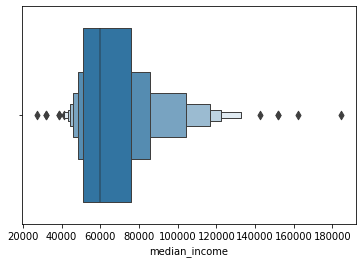

In [59]:
sn.boxenplot(all_df['median_income'].astype(float))

Text(0.5, 1.0, 'Median Income Distribution')

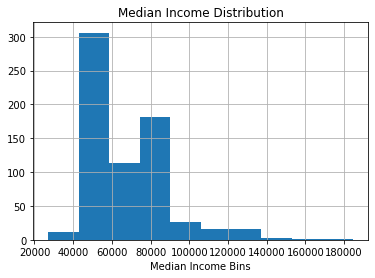

In [60]:
all_df['median_income'].astype(float).hist()
plt.xlabel('Median Income Bins')
plt.title('Median Income Distribution')

In [61]:
all_df['median_income'] = all_df['median_income'].astype(float) 

In [62]:
temp_df['median_income'] = temp_df['median_income'].astype(float) 

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
all_df['median_income'].describe()

count       676.000000
mean      66941.738166
std       20219.824816
min       27205.000000
25%       51053.000000
50%       59911.000000
75%       75766.000000
max      184500.000000
Name: median_income, dtype: float64

In [64]:
import numpy as np

bins = [20000, 40000, 60000, 80000,100000]
bin_conv = [i+1 for i in range(len(bins))]
all_df['zip_binned_by_income'] = np.searchsorted(bins, all_df['median_income'].values)
temp_df['zip_binned_by_income'] = np.searchsorted(bins, temp_df['median_income'].values)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
all_df[['zip_binned_by_income', 'median_income']]

,zip_binned_by_income,median_income
0,3,65627.0
1,3,65627.0
2,3,65627.0
3,3,65627.0
4,3,69213.0
...,...,...
671,1,27205.0
672,3,66584.0
673,5,106523.0
674,2,54940.0


In [66]:
all_df['zip_binned_by_income'].unique()

array([3, 2, 4, 5, 1])

In [67]:
temp_df['zip_binned_by_income'].unique()

array([3, 2, 4, 5, 1])

<AxesSubplot:>

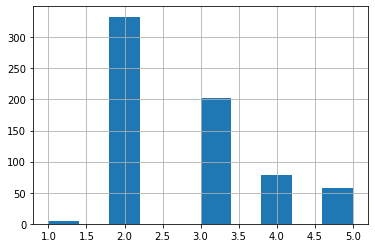

In [68]:
# histogram for counts for zipped bin by median income 
all_df['zip_binned_by_income'].hist()

In [69]:
all_df.head(20)

,zip_cust_table,ethnicity_display,age_at_admit,discharge_disposition_display,race_display,race_eth_comb,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,...,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,total_comorbidities,has_comorbidity,death,age_binned,zip_binned_by_income
0,78130,Hispanic or Latino,44,Expired,Hispanic,White Hispanic,97.0,NaN,30.62,False,...,1.5,10,65627.0,84515,9.5,0,0,1,6,3
1,78130,Hispanic or Latino,71,Rehab Care,Hispanic,White Hispanic,101.0,37.2,27.76,False,...,1.5,10,65627.0,84515,9.5,2,1,0,9,3
2,78130,Hispanic or Latino,71,Skilled Nursing Care,Hispanic,White Hispanic,98.0,36.9,NaN,False,...,1.5,10,65627.0,84515,9.5,3,1,0,9,3
3,78130,Unknown,47,Still a patient,White,White Unknown Ethnicity,98.0,36.7,NaN,False,...,1.5,10,65627.0,84515,9.5,0,0,0,7,3
4,78612,Not Hispanic or Latino,49,Home,White,White Non Hispanic,99.0,37.4,44.89,False,...,6.3,10.9,69213.0,80458,10.6,0,0,0,7,3
5,78612,Hispanic or Latino,59,Long Term Care Hospital,Other Race,Other Race Hispanic,107.0,36.6,37.05,False,...,6.3,10.9,69213.0,80458,10.6,2,1,0,8,3
6,78612,Hispanic or Latino,26,Home,Hispanic,White Hispanic,61.0,36.9,30.90,False,...,6.3,10.9,69213.0,80458,10.6,0,0,0,5,3
7,78612,Hispanic or Latino,70,Expired,Hispanic,White Hispanic,97.0,37.2,NaN,False,...,6.3,10.9,69213.0,80458,10.6,2,1,1,9,3
8,78612,Hispanic or Latino,63,Expired,Hispanic,White Hispanic,67.0,37.0,24.76,False,...,6.3,10.9,69213.0,80458,10.6,1,1,1,8,3
9,78753,Not Hispanic or Latino,24,Long Term Care Hospital,White,White Non Hispanic,143.0,37.1,34.54,False,...,2,19.3,51053.0,68301,17.6,0,0,0,4,2


### Mortality per binned income

In [70]:
all_df['zip_binned_by_income'].unique()

array([3, 2, 4, 5, 1])

In [71]:
death_zip_df = all_df[all_df['death'] == 1]
death_zip_count = Counter(death_zip_df['zip_binned_by_income'])
death_zip_count

Counter({3: 48, 2: 69, 4: 21, 5: 10, 1: 3})

In [72]:
death_zip_count[3]

48

In [73]:
for key in death_zip_count:
    death_zip_count[key] = round((death_zip_count[key] / sum(all_df['death'])), 4) * 100

In [74]:
death_zip_count

Counter({3: 31.790000000000003,
         2: 45.7,
         4: 13.91,
         5: 6.619999999999999,
         1: 1.9900000000000002})

In [75]:
age_bins = ['$0 - $19,999', '$20,000 - $39,999', '$40,000 - $59,999', '$60,000 - $79,999', '$80,000 - $99,999', '$100,000+']

In [76]:
conv_age_bins = []
for key in death_zip_count:
    conv_age_bins.append(age_bins[key])



Text(0.5, 1.0, 'Mortality Percentages for Binned Median Income')

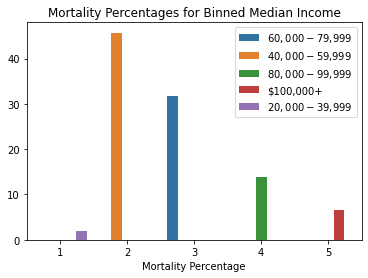

In [77]:
import matplotlib.pyplot as plt
keys= list(death_zip_count.keys())
vals = [death_zip_count[k] for k in keys]

sn.barplot(x=keys, y=vals, hue=conv_age_bins)
plt.legend(loc='upper right')
plt.xlabel('Binned Median Income')
plt.xlabel('Mortality Percentage')
plt.title('Mortality Percentages for Binned Median Income')

In [78]:
sum(all_df['death'])

151

In [79]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(
               all_df['death'][all_df['zip_binned_by_income'] == 1],
               all_df['death'][all_df['zip_binned_by_income'] == 2],
               all_df['death'][all_df['zip_binned_by_income'] == 3],
               all_df['death'][all_df['zip_binned_by_income'] == 4],
               all_df['death'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=6.48111868033658, pvalue=0.1659839536969566)

In [80]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 1],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 2],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 3],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 4],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=6.156530854114128, pvalue=0.18775944760589286)

In [81]:
stats.kruskal(
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 1],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 2],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 3],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 4],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=7.329074090514673, pvalue=0.1194869096948559)

In [83]:
stats.kruskal(
               all_df['has_comorbidity'][all_df['zip_binned_by_income'] == 1],
               all_df['has_comorbidity'][all_df['zip_binned_by_income'] == 2],
               all_df['has_comorbidity'][all_df['zip_binned_by_income'] == 3],
               all_df['has_comorbidity'][all_df['zip_binned_by_income'] == 4],
               all_df['has_comorbidity'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=11.76833273793827, pvalue=0.019159773587864914)

In [85]:
stats.kruskal(
               all_df['COPD_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['COPD_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['COPD_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['COPD_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['COPD_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=25.960769832810314, pvalue=3.22262362560103e-05)

In [86]:
stats.kruskal(
               all_df['asthma_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['asthma_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['asthma_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['asthma_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['asthma_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=3.844763328290256, pvalue=0.4274223083771791)

In [93]:
stats.kruskal(
               all_df['diabetes_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=20.766274619559017, pvalue=0.0003523081874814849)

In [88]:
stats.kruskal(
               all_df['hypertension_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['hypertension_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['hypertension_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['hypertension_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['hypertension_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=6.448219448990421, pvalue=0.16808235657539575)

In [89]:
stats.kruskal(
               all_df['CAD_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['CAD_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['CAD_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['CAD_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['CAD_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=4.516512732656148, pvalue=0.340593984976224)

In [90]:
stats.kruskal(
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=6.686637153647336, pvalue=0.1534040679427804)

In [91]:
stats.kruskal(
               all_df['CKD_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['CKD_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['CKD_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['CKD_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['CKD_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=4.9694368514691805, pvalue=0.2904478662745302)

In [92]:
stats.kruskal(
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=9.290109732376834, pvalue=0.05424334595981443)

In [73]:
pairwise_tukeyhsd?

In [95]:
print(pairwise_tukeyhsd(all_df['death'], all_df['zip_binned_by_income']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.3928 0.2232 -0.9055 0.1199  False
     1      3  -0.3635 0.3023 -0.8787 0.1516  False
     1      4  -0.3308 0.4219 -0.8557 0.1942  False
     1      5  -0.4246 0.1854 -0.9553 0.1062  False
     2      3   0.0292    0.9 -0.0721 0.1306  False
     2      4    0.062 0.7328 -0.0811 0.2052  False
     2      5  -0.0318    0.9 -0.1949 0.1313  False
     3      4   0.0328    0.9 -0.1188 0.1844  False
     3      5   -0.061   0.85 -0.2316 0.1096  False
     4      5  -0.0938 0.6713 -0.2921 0.1045  False
---------------------------------------------------


In [96]:
print(pairwise_tukeyhsd(temp_df['qSOFA_score'], temp_df['zip_binned_by_income']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.357 0.8348 -1.3288 0.6147  False
     1      3  -0.3605 0.8318 -1.3365 0.6154  False
     1      4  -0.3019    0.9 -1.2925 0.6887  False
     1      5  -0.0648    0.9 -1.0658 0.9361  False
     2      3  -0.0035    0.9 -0.1797 0.1727  False
     2      4   0.0551    0.9 -0.1896 0.2998  False
     2      5   0.2922 0.0399  0.0085  0.576   True
     3      4   0.0586    0.9 -0.2024 0.3195  False
     3      5   0.2957 0.0528 -0.0022 0.5936  False
     4      5   0.2371 0.3226 -0.1057   0.58  False
---------------------------------------------------


In [97]:
print(pairwise_tukeyhsd(all_df['total_comorbidities'], all_df['zip_binned_by_income']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1736    0.9 -1.3467 1.6938  False
     1      3   0.3192    0.9 -1.2082 1.8466  False
     1      4   0.4462    0.9 -1.1104 2.0027  False
     1      5  -0.0316    0.9 -1.6053 1.5421  False
     2      3   0.1456 0.6531 -0.1548 0.4461  False
     2      4   0.2726 0.4015 -0.1519  0.697  False
     2      5  -0.2052 0.7469 -0.6888 0.2785  False
     3      4   0.1269    0.9 -0.3225 0.5764  False
     3      5  -0.3508 0.3198 -0.8566  0.155  False
     4      5  -0.4777 0.1728 -1.0657 0.1102  False
---------------------------------------------------


### Poverty Rate 

In [98]:
all_df['poverty_rate'] = all_df['poverty_rate'].astype(float)
temp_df['poverty_rate'] = temp_df['poverty_rate'].astype(float)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
all_df['poverty_rate'].describe()

count    676.000000
mean      14.031509
std        6.435137
min        2.300000
25%        9.100000
50%       12.700000
75%       18.400000
max       38.700000
Name: poverty_rate, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='poverty_rate'>

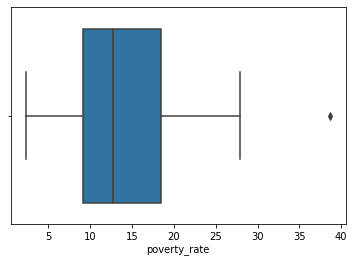

In [100]:
sn.boxplot(all_df['poverty_rate'])

In [101]:
bins = [0, 6, 12, 18,24,30,36,40]
bin_conv = [i+1 for i in range(len(bins))]
all_df['zip_binned_by_poverty'] = np.searchsorted(bins, all_df['poverty_rate'].values)
temp_df['zip_binned_by_poverty'] = np.searchsorted(bins, temp_df['poverty_rate'].values)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [102]:
all_df['zip_binned_by_poverty'].unique()

array([2, 3, 4, 1, 5, 7])

In [104]:
# H-Test to test if binned age group means are statistically different against average prediction of death
print(stats.kruskal(
               all_df['death'][all_df['zip_binned_by_poverty'] == 1],
               all_df['death'][all_df['zip_binned_by_poverty'] == 2],
               all_df['death'][all_df['zip_binned_by_poverty'] == 3],
               all_df['death'][all_df['zip_binned_by_poverty'] == 4],
               all_df['death'][all_df['zip_binned_by_poverty'] == 5],
                all_df['death'][all_df['zip_binned_by_poverty'] == 7],
               ))

# H-Test to test if binned age group means are statistically different against average prediction of death
print(stats.kruskal(
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 1],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 2],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 3],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 4],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 5],
               ))



print(stats.kruskal(
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 1],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 2],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 3],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 4],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 5],
                all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 7],
               ))


print(stats.kruskal(
               all_df['has_comorbidity'][all_df['zip_binned_by_poverty'] == 1],
               all_df['has_comorbidity'][all_df['zip_binned_by_poverty'] == 2],
               all_df['has_comorbidity'][all_df['zip_binned_by_poverty'] == 3],
               all_df['has_comorbidity'][all_df['zip_binned_by_poverty'] == 4],
               all_df['has_comorbidity'][all_df['zip_binned_by_poverty'] == 5],
                all_df['has_comorbidity'][all_df['zip_binned_by_poverty'] == 7],
               ))

print(stats.kruskal(
               all_df['COPD_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['COPD_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['COPD_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['COPD_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['COPD_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['COPD_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))

print(stats.kruskal(
               all_df['asthma_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['asthma_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['asthma_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['asthma_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['asthma_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['asthma_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))

print(stats.kruskal(
               all_df['diabetes_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['diabetes_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['diabetes_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))

print(stats.kruskal(
               all_df['CAD_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['CAD_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['CAD_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['CAD_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['CAD_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['CAD_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))

print(stats.kruskal(
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['heartfailure_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['heartfailure_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))


print(stats.kruskal(
               all_df['CKD_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['CKD_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['CKD_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['CKD_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['CKD_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['CKD_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))


print(stats.kruskal(
               all_df['cancer_com_flag'][all_df['zip_binned_by_poverty'] == 1],
               all_df['cancer_com_flag'][all_df['zip_binned_by_poverty'] == 2],
               all_df['cancer_com_flag'][all_df['zip_binned_by_poverty'] == 3],
               all_df['cancer_com_flag'][all_df['zip_binned_by_poverty'] == 4],
               all_df['cancer_com_flag'][all_df['zip_binned_by_poverty'] == 5],
                all_df['cancer_com_flag'][all_df['zip_binned_by_poverty'] == 7],
               ))

print(stats.kruskal(
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 1],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 2],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 3],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 4],
               all_df['cancer_com_flag'][all_df['zip_binned_by_income'] == 5]
               ))

KruskalResult(statistic=5.294010966158078, pvalue=0.3810620392163848)
KruskalResult(statistic=12.921979195974854, pvalue=0.011663376751185534)
KruskalResult(statistic=8.819989093672229, pvalue=0.11646321653179063)
KruskalResult(statistic=13.336028104209433, pvalue=0.020425289995059055)
KruskalResult(statistic=20.1673502515982, pvalue=0.0011625027257898854)
KruskalResult(statistic=4.263107542213047, pvalue=0.5121896335862659)
KruskalResult(statistic=17.860409219958687, pvalue=0.003126535573859939)
KruskalResult(statistic=8.525939475301348, pvalue=0.12953354862951563)
KruskalResult(statistic=5.7756428633403845, pvalue=0.3286655829972444)
KruskalResult(statistic=2.125984148253519, pvalue=0.8314524385645052)
KruskalResult(statistic=5.058501524420044, pvalue=0.40878241816731403)
KruskalResult(statistic=9.290109732376834, pvalue=0.05424334595981443)


In [82]:
stats.kruskal(
               all_df['death'][all_df['zip_binned_by_poverty'] == 1],
               all_df['death'][all_df['zip_binned_by_poverty'] == 2],
               all_df['death'][all_df['zip_binned_by_poverty'] == 3],
               all_df['death'][all_df['zip_binned_by_poverty'] == 4],
               all_df['death'][all_df['zip_binned_by_poverty'] == 5],
                all_df['death'][all_df['zip_binned_by_poverty'] == 7],
               )

KruskalResult(statistic=5.294010966158078, pvalue=0.3810620392163848)

In [83]:
temp_df['zip_binned_by_poverty'].unique()33.23

array([2, 3, 4, 1, 5])

In [84]:
stats.kruskal(
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 1],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 2],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 3],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 4],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 5],
               )

KruskalResult(statistic=12.921979195974854, pvalue=0.011663376751185534)

In [85]:
stats.kruskal(
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 1],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 2],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 3],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 4],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 5],
                all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 7],
               )

KruskalResult(statistic=8.819989093672229, pvalue=0.11646321653179063)

In [86]:
print(pairwise_tukeyhsd(all_df['death'], all_df['zip_binned_by_poverty']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0128    0.9 -0.1384 0.1639  False
     1      3   0.0058    0.9 -0.1463 0.1578  False
     1      4  -0.0351    0.9  -0.193 0.1227  False
     1      5    0.048    0.9 -0.1845 0.2806  False
     1      7   0.7778 0.4324 -0.4198 1.9754  False
     2      3   -0.007    0.9 -0.1272 0.1132  False
     2      4  -0.0479 0.8882 -0.1754 0.0795  False
     2      5   0.0353    0.9 -0.1779 0.2484  False
     2      7    0.765 0.4482  -0.429  1.959  False
     3      4  -0.0409    0.9 -0.1693 0.0876  False
     3      5   0.0423    0.9 -0.1715  0.256  False
     3      7    0.772 0.4377  -0.422 1.9661  False
     4      5   0.0832 0.8786 -0.1347 0.3011  False
     4      7   0.8129 0.3771 -0.3819 2.0077  False
     5      7   0.7297 0.5115 -0.4772 1.9367  False
---------------------------------------------------


In [87]:
# Interesting note about poverty rate 
# poverty rate bands were created by looking at the std of poverty rate counts 
# having qSOFA that is not based on presenting labs and vitals might be interesting 
# to suss out whether or not there are clear differences in means for poverty rate 
print(pairwise_tukeyhsd(temp_df['qSOFA_score'], temp_df['zip_binned_by_poverty']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.3252 0.0036 -0.5748 -0.0756   True
     1      3  -0.3292  0.003 -0.5784 -0.0801   True
     1      4  -0.3303 0.0044  -0.588 -0.0726   True
     1      5   -0.288 0.2262 -0.6651  0.0892  False
     2      3  -0.0041    0.9 -0.2028  0.1947  False
     2      4  -0.0051    0.9 -0.2145  0.2043  False
     2      5   0.0372    0.9 -0.3087  0.3831  False
     3      4   -0.001    0.9 -0.2099  0.2078  False
     3      5   0.0413    0.9 -0.3043  0.3869  False
     4      5   0.0423    0.9 -0.3095  0.3941  False
----------------------------------------------------


In [88]:
print(pairwise_tukeyhsd(all_df['total_comorbidities'], all_df['zip_binned_by_poverty']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1278    0.9 -0.3196 0.5752  False
     1      3  -0.0782    0.9 -0.5281 0.3717  False
     1      4  -0.0996    0.9 -0.5668 0.3675  False
     1      5   0.3237 0.7326 -0.3646 1.0121  False
     1      7  -1.6222 0.7534 -5.1665  1.922  False
     2      3   -0.206 0.5535 -0.5616 0.1497  False
     2      4  -0.2274 0.5142 -0.6046 0.1498  False
     2      5   0.1959    0.9 -0.4348 0.8267  False
     2      7    -1.75 0.6915 -5.2835 1.7835  False
     3      4  -0.0215    0.9 -0.4016 0.3587  False
     3      5   0.4019 0.4579 -0.2307 1.0345  False
     3      7   -1.544 0.7876 -5.0779 1.9898  False
     4      5   0.4234 0.4198 -0.2216 1.0683  False
     4      7  -1.5226  0.798 -5.0587 2.0135  False
     5      7  -1.9459   0.61  -5.518 1.6261  False
---------------------------------------------------


In [89]:
# mean income 
all_df['median_income'].describe()

count       676.000000
mean      66941.738166
std       20219.824816
min       27205.000000
25%       51053.000000
50%       59911.000000
75%       75766.000000
max      184500.000000
Name: median_income, dtype: float64

In [90]:
all_df['poverty_rate'].describe()

count    676.000000
mean      14.031509
std        6.435137
min        2.300000
25%        9.100000
50%       12.700000
75%       18.400000
max       38.700000
Name: poverty_rate, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='poverty_rate'>

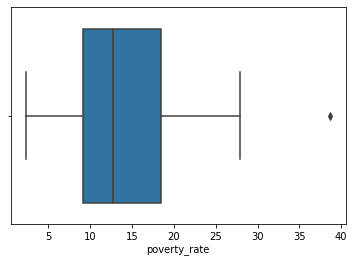

In [91]:
sn.boxplot(all_df['poverty_rate'])

In [92]:
Counter(all_df['zip_binned_by_income'])

Counter({3: 203, 2: 333, 4: 78, 5: 57, 1: 5})

In [93]:
Counter(all_df['zip_binned_by_poverty'])

Counter({2: 200, 3: 193, 4: 155, 1: 90, 5: 37, 7: 1})

In [94]:
bins = [0, 6, 12, 18,24,30,36,40]

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zip_binned_by_poverty', ylabel='Density'>

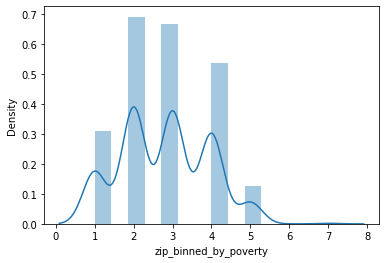

In [95]:
sn.distplot(all_df['zip_binned_by_poverty'])

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zip_binned_by_income', ylabel='Density'>

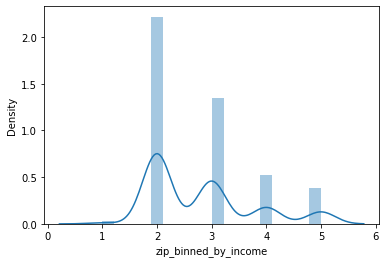

In [96]:
sn.distplot(all_df['zip_binned_by_income'])

In [111]:
group_df = pd.read_csv('group_means.csv')

In [112]:
group_df.head()

,Category Being Tested,Group Mean Outcome,H Statistic,P-Values
0,Race,Mortality,20.82,0.0020
1,Race,qSOFA Score,16.01,0.0140
2,Race,Total Number of Comorbidities,12.38,0.0540
3,Race,Has at least one Comorbiditiy,6.79,0.3410
4,Race,Has COPD,24.22,0.0005


In [ ]:
group_df.columns

In [109]:
group_df.columns

Index(['Category Being Tested', 'Group Mean Outcome', 'H Statistic',
       'P-Values'],
      dtype='object')

In [120]:
df = group_df.groupby(['Category Being Tested', 'Group Mean Outcome', 'H Statistic',
       'P-Values']).count()
df.reset_index()

,Category Being Tested,Group Mean Outcome,H Statistic,P-Values
0,Age,Has Asthma,12.930,0.2280
1,Age,Has CAD,44.680,2.4800
2,Age,Has CKD,33.230,0.0002
3,Age,Has COPD,42.600,5.8550
4,Age,Has Cancer,8.360,0.5900
5,Age,Has Diabetes,57.810,9.3800
6,Age,Has Heartfailure,33.300,0.0002
7,Age,Has Hyptertension,50.800,1.9000
8,Age,Has at least one Comorbiditiy,102.000,1.8640
9,Age,Mortality,72.280,1.6000


In [121]:
print(df.reset_index().round(2).to_latex(index=False))  

\begin{tabular}{llrr}
\toprule
Category Being Tested &              Group Mean Outcome &  H Statistic &  P-Values \\
\midrule
                  Age &                      Has Asthma &        12.93 &      0.23 \\
                  Age &                        Has CAD  &        44.68 &      2.48 \\
                  Age &                         Has CKD &        33.23 &      0.00 \\
                  Age &                        Has COPD &        42.60 &      5.86 \\
                  Age &                      Has Cancer &         8.36 &      0.59 \\
                  Age &                    Has Diabetes &        57.81 &      9.38 \\
                  Age &                Has Heartfailure &        33.30 &      0.00 \\
                  Age &               Has Hyptertension &        50.80 &      1.90 \\
                  Age &  Has at least one Comorbiditiy  &       102.00 &      1.86 \\
                  Age &                       Mortality &        72.28 &      1.60 \\
              